# Networks and Graphs
Based Data Science from Scratch. Chapter 21

# What is a Graph?
A graph is a pictorial representation of a set of objects where some pairs of objects are connected by links. The interconnected objects are represented by points termed as vertices, and the links that connect the vertices are called edges.  

![](images/graph.jpg)
## Terminology
- **Vertex** or **Node** − Each element of the graph is represented as a vertex. In the above example, the labeled circle represents vertices. Thus, A to G are vertices. We can represent them using an array as shown in the following image. Here A can be identified by index 0. B can be identified using index 1 and so on.
- **Edge** − Edge represents a path between two vertices or a line between two vertices. In the following example, the lines from A to B, B to C, and so on represents edges. We can use a two-dimensional array to represent an array as shown above. Thus AB can be represented as 1 at row 0, column 1, BC as 1 at row 1, column 2 and so on, keeping other combinations as 0.
- **Adjacency** − Two node or vertices are adjacent if they are connected to each other through an edge. In the above example, B is adjacent to A, C is adjacent to B, and so on.
- **Path** − Path represents a sequence of edges between the two vertices. In the above example, ABCD represents a path from A to D.
- **Weight** Edges may be weighted, illustrating the 'price' of moving from one Vertex to another (like the road length from one city to another.
- **cyclic vs acyclic** If a graph is cyclic it means that there are one ore more path that starts at a vertex and end at the same vertex.

## Undirected Graphs

A *graph* $G$ consists of a nonempty set, $V(G)$, called the *vertices* of $G$, and a set $E(G)$ called the *edges* of $G$.  

An element of $E(G)$ is an *undirected* edge or simply an "edge". An undirected edge has two vertices $u\neq v$ called its endpoints. Such an edge can be represented by the two element set $\{u, v\}$. The notation $\langle u—v \rangle$ denotes this edge.
Both $\langle u—v \rangle$ and $\langle v—u \rangle$ define the same undirected edge, whose endpoints are $u$ and $v$.

![](./images/graph_example.png)

For example, let $H$ be the graph pictured in Figure above. The vertices of $H$
correspond to the nine dots, that is, $V(H) = \{a,b,c,d,e,f,g,h,i\}$

The edges correspond to the eight lines, that is,

$E(H) = \big\{\langle a—b \rangle,\langle a—c \rangle,\langle b—d \rangle,\langle c—d \rangle,\langle c—e \rangle,\langle e—f \rangle,\langle e—g \rangle,\langle h—i \rangle\big\} $


## Directed Graphs

A *directed graph* -or *digraph*- $G$ consists of a nonempty set $V(G)$, called the vertices of $G$, and a set $E(G)$, called the edges of $G$. An element of $E(G)$ is called a *directed edge*. A directed edge is also called an "arrow" or simply an "edge". A directed edge starts at some vertex $u$ called the *tail* of the edge, and ends at some vertex $v$ called the *head* of the edge.

![](./images/digraph_example.png)


### Vertex Degrees

The *in-degree* of a vertex in a digraph is the number of arrows coming into it, and similarly its *out-degree* is the number of arrows out of it.

##### References:
The definitions above and the illustrations are taken from the book:
*Mathematics for Computer Science*, Eric Lehman, F. Tom Leighton, Albert R. Meyer
https://courses.csail.mit.edu/6.042/spring17/mcs.pdf

## More detailed explanation

[A python guide to graph theory](https://runestone.academy/runestone/books/published/pythonds/Graphs/toctree.html)

## Example of a weighted graph:
```python
g = {'Frankfurt': {'Mannheim':85, 'Wurzburg':217, 'Kassel':173},
     'Mannheim': {'Frankfurt':85, 'Karlsruhe':80},
     'Karlsruhe': {'Augsburg':250, 'Mannheim':80},
     'Augsburg': {'Karlsruhe':250, 'Munchen':84},
     'Wurzburg': {'Erfurt':186, 'Numberg':103,'Frankfurt':217},
     'Erfurt': {'Wurzburg':186},
     'Numberg': {'Wurzburg':103, 'Stuttgart':183,'Munchen':167},
     'Munchen': {'Numberg':167, 'Augsburg':84,'Kassel':502},
     'Kassel': {'Frankfurt':173, 'Munchen':502},
     'Stuttgart': {'Numberg':183}
     }
```
![](images/weighted_graph.png)

### Graph use cases:
- Finding clusters in data using the connected_components algorithm (identifying all isolated parts of graph). Eg. roadmap to identify all islands
- Identify fraud by finding all connected accounts where the first account was idenfied as used for fraudulent purposes
- In a social network find groups that are only connected to each other (like secrete societies or terror cells?)
- From a phone calling list find the whole network of people connected to that phone.

### Traversal algorithms: BFS vs DFS (breath first or depth first)

|Basis for comparison| BFS|  DFS|
|--|--|--|
|Basic|	Vertex-based algorithm|	Edge-based algorithm|
|Data structure used to store the nodes|	Queue|	Stack|
|Memory consumption|	Inefficient|	Efficient|
|Structure of the constructed tree|	Wide and short|	Narrow and long|
|Traversing fashion|	Oldest unvisited vertices are explored at first| Vertices along the edge are explored in the beginning|
|Optimality|	Optimal for finding the shortest distance | Not optimal|
|Application	Examines bipartite graph - connected component and shortest path present in a graph| Examines two-edge connected graph - strongly connected graph - acyclic graph and topological order|

# Concrete example (LinkedIn)

Lets generate a directed graph - a social network-, which expresses endorsements between various people similar as in *LinkedIn*. The nodes of our digraph will be persons and the edges will represent endorsments. 

### Name Generator
For the nodes, we will generate a set of "random" people. That is, we generate names as given in the USA randomly. A list of US American names can be received here:
http://www.census.gov/topics/population/genealogy/data/1990_census/1990_census_namefiles.html


In the following we download the files and generate three lists, one for female names, one for male names, and one for surnames.

In [1]:
from modules import webget
import random

surnames_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.all.last'
female_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.female.first'
male_names_txt = 'http://www2.census.gov/topics/genealogy/1990surnames/dist.male.first'

webget.download(surnames_txt, to='./last_names.txt')
webget.download(female_names_txt, to='./female_names.txt')
webget.download(male_names_txt, to='./male_names.txt') 

'./male_names.txt'

In [2]:
%%bash
ls -ltr *names.txt

-rw-r--r-- 1 jovyan users 3107965 Jul 22 22:54 last_names.txt
-rw-r--r-- 1 jovyan users  149625 Jul 22 22:54 female_names.txt
-rw-r--r-- 1 jovyan users   42665 Jul 22 22:54 male_names.txt


In [3]:
def get_names_from(file):
    with open(file, 'r') as fp:
        return [x.split()[0] for x in fp]

In [4]:
names = get_names_from('./last_names.txt')
female_names = get_names_from('./female_names.txt')
male_names = get_names_from('./male_names.txt')

print('family names:{}, female names:{}, male names:{}'.format(len(names), len(female_names), len(male_names)))

family names:88799, female names:4275, male names:1219


We decide to let names be a two-element tuple consisting of a name and a surname.

In [5]:
import random 
def random_combination(list_a, list_b):
    """return a person by firstname and lastname randomly"""
    return random.choice(list_a) + ' ' + random.choice(list_b)
random_combination(female_names,names)

'RAYMOND OLOFSON'

In [6]:
def generate_random_names(amount=1, gender='female'):  
    """given an amount and a gender return that many persons by first and last-name"""
    random_names = []
    for i in range(amount):
        if gender == 'female':
            name = random_combination(female_names, names)
        elif gender == 'male':
            name = random_combination(male_names, names)
        else:
            name = random_combination(male_names + female_names, names)
        random_names.append(name)
    return random_names
    
generate_random_names(amount=10, gender='random')

['LADAWN CIPOLLONI',
 'ELROY WARSTLER',
 'STEFFANIE BURROW',
 'ROY ALSAQRI',
 'DEONNA STIEGLER',
 'TAMARA FERRANTI',
 'MINA PARNELL',
 'HORTENSE ACKLEY',
 'BLAKE SANTOY',
 'ALTA COLEN']

# Generating Nodes

Now, that we have our name generator in place we are good to start generating our *endorsment graph*.

For our example graph, we decide that it contains 100 persons, i.e., 100 nodes. Half of the nodes represents women and the other half represents men.

In [7]:
total_no_nodes = 100
no_nodes_per_gender = total_no_nodes // 2

In [8]:
female_names_list = generate_random_names(amount=no_nodes_per_gender, gender='female')
male_names_list = generate_random_names(amount=no_nodes_per_gender, gender='male')

In [9]:
all_names_list = female_names_list + male_names_list 
all_names_list[:4]

['CHEYENNE ANNE', 'ROSARIO DEPHILLIPS', 'GERTHA TINCHER', 'ALEXA BOEDECKER']

# Generating Edges

Randomly connected (=endorsed).
Also, it is not possible for a person to connect to herself.

In [10]:
from tqdm import tqdm
from random import randint
from numpy.random import choice

### Creating random numbers 
Each person needs a number of connections.  
We will create a random number between 0 and 100 (both inclusive) with controlled probability. Eg. the chance of getting a number between 5 to 10 is much higher than a number from 51 to 100 or getting 0

In [11]:
RELATION_CLASSES = {
        0: (0, 0),
        1: (1, 4),
        2: (5, 10),
        3: (11, 20),
        4: (21, 50),
        5: (51, 100)
    }
PROBABILITIES = [0.05, 0.36, 0.45, 0.1, 0.035, 0.005]

In [12]:
def get_no_endorsements():
    """returns a random number between 0 and 100 based on probabilites"""
    no_relation_class = choice(list(RELATION_CLASSES.keys()), 
                               p=PROBABILITIES)
    no_endorsments = randint(RELATION_CLASSES[no_relation_class][0], 
                             RELATION_CLASSES[no_relation_class][1])
    return no_endorsments

a = [1, 2, 3, 4]
b = [5, 6, 7, 8]
print(list(zip(a, b)))
get_no_endorsements()

[(1, 5), (2, 6), (3, 7), (4, 8)]


0

In [13]:
def create_endorsements(node_list):
    """based on a list of names returns a list of graph edges like [(1,10), (1,4), (1,99), ...]"""
    endorsements = []
    idx_list = range(len(node_list))

    for idx, name_pair in tqdm(enumerate(node_list)):
        # get how many people this person (name_pair) endorses
        no_endorsments = get_no_endorsements()
        if no_endorsments > 0:
            # get a list of potential endorsements
            potential_endorsement_idxs = random.sample(idx_list, no_endorsments)
            if idx in potential_endorsement_idxs:
                # Removing myself in case I am in the list
                # cannot endorse myself
                idx_me_in_endorsements = potential_endorsement_idxs.index(idx)
                del potential_endorsement_idxs[idx_me_in_endorsements]
            # zip idx * number of endorsements width each endorsement
            endorsements += list(zip([idx for _ in range(len(potential_endorsement_idxs))], 
                                     potential_endorsement_idxs))
    return endorsements

endorsements = create_endorsements(all_names_list)
endorsements

100it [00:00, 13815.69it/s]


[(0, 45),
 (0, 24),
 (1, 5),
 (1, 36),
 (1, 27),
 (1, 9),
 (2, 32),
 (2, 28),
 (2, 68),
 (2, 85),
 (3, 46),
 (3, 32),
 (3, 78),
 (3, 69),
 (3, 79),
 (3, 87),
 (5, 69),
 (5, 87),
 (5, 88),
 (5, 21),
 (5, 81),
 (5, 3),
 (5, 72),
 (6, 71),
 (6, 26),
 (6, 10),
 (6, 56),
 (6, 59),
 (6, 75),
 (6, 50),
 (6, 4),
 (6, 49),
 (6, 66),
 (6, 11),
 (6, 27),
 (6, 33),
 (6, 16),
 (6, 91),
 (6, 88),
 (6, 47),
 (6, 29),
 (6, 79),
 (7, 75),
 (7, 43),
 (8, 21),
 (8, 7),
 (8, 88),
 (8, 74),
 (8, 55),
 (8, 65),
 (8, 80),
 (8, 62),
 (8, 40),
 (8, 43),
 (9, 19),
 (9, 6),
 (9, 45),
 (9, 67),
 (9, 32),
 (9, 3),
 (9, 5),
 (9, 41),
 (10, 59),
 (10, 40),
 (10, 35),
 (10, 67),
 (11, 84),
 (11, 56),
 (11, 59),
 (11, 37),
 (11, 5),
 (11, 92),
 (11, 26),
 (11, 88),
 (11, 79),
 (12, 87),
 (12, 33),
 (12, 64),
 (13, 93),
 (13, 88),
 (13, 62),
 (13, 55),
 (13, 40),
 (13, 92),
 (13, 41),
 (13, 11),
 (14, 40),
 (14, 27),
 (14, 81),
 (14, 84),
 (14, 74),
 (14, 69),
 (15, 72),
 (15, 82),
 (15, 29),
 (15, 45),
 (15, 0),
 (15,

In [14]:
print(endorsements[:20])
print(all_names_list[:20])

[(0, 45), (0, 24), (1, 5), (1, 36), (1, 27), (1, 9), (2, 32), (2, 28), (2, 68), (2, 85), (3, 46), (3, 32), (3, 78), (3, 69), (3, 79), (3, 87), (5, 69), (5, 87), (5, 88), (5, 21)]
['CHEYENNE ANNE', 'ROSARIO DEPHILLIPS', 'GERTHA TINCHER', 'ALEXA BOEDECKER', 'JANUARY QUINERLY', 'LOAN RUBLEE', 'KEITH MEO', 'AUREA PANTHER', 'NARCISA BENJAMINE', 'NUBIA CONNOLLY', 'MAISIE LOOKER', 'REGINA KEITHAN', 'MANDA OMAN', 'YON DHARAS', 'ALINA RENNER', 'GISELE ADDAMS', 'MISTY DERION', 'ALETA GREENSPAN', 'CARLEY PAROBEK', 'KARMA ADDUCI']


In [15]:
#%%bash
#conda install -y networkx
#conda install -c anaconda pygraphviz 

In [16]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## networkx
NetworkX is a Python package for the creation, manipulation, and study of complex networks.

Read more about it [here](https://networkx.github.io/documentation/stable/reference/introduction.html)

In [17]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout, write_dot

def create_graph():
    graph = nx.DiGraph() 
    graph.clear()

    # add node by node, needed to add attributes...
    print(len(all_names_list))

    for idx, name_pair in enumerate(all_names_list):
        graph.add_node(idx, name=' '.join(name_pair))
    
    # graph.add_nodes_from(all_names_list)
    graph.add_edges_from(endorsements)

    return graph

In [18]:
import pygraphviz

100


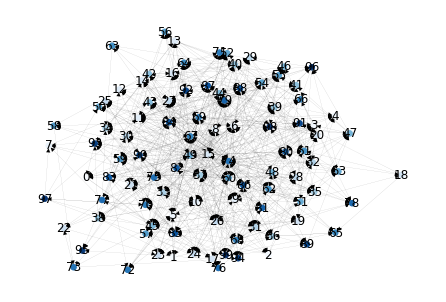

In [19]:
def draw_graph(graph):
    nx.draw(graph, pos=graphviz_layout(graph), 
            node_size=30, width=.05, cmap=plt.cm.Blues, 
            with_labels=True, node_color=range(len(graph)))
    
graph = create_graph()
draw_graph(graph)

#nx.write_gml(graph, './social_network.gml')

In [20]:
print(graph.nodes[10]['name'])
print(graph.out_degree(10))
print(graph.out_edges(10))
print(graph.in_edges(10))

M A I S I E   L O O K E R
4
[(10, 59), (10, 40), (10, 35), (10, 67)]
[(6, 10), (15, 10), (38, 10), (45, 10), (46, 10), (48, 10), (74, 10), (83, 10), (86, 10), (90, 10)]


In [21]:
# print(graph.node)
print(graph.number_of_nodes())

100


## Who is the most interesting person in our network?

Likely, you are tempted to find the person in the graph, which has the highest in-degree. For example with code similar to the following.

In [22]:
import numpy as np

in_deg_vec = np.array([graph.in_degree(n) for n in graph.nodes()])
print(in_deg_vec)
in_deg_vec.max() # return largest value

[ 6  4  4  9  7  8 11  4  6 11 10  9  5  4  6  4  7  4  2  6  6  8  4  6
 10  6  9 11  5  7  7  9  8  8  9  8  9 12  6  6  8  7  3 10  6  9  7  5
  3  7  6  7  8  8  6  7  8  7  4 10  9  9  7  3 10  6  7 10  7 11  9 10
  5  2 14  5  5  5  7 10  9  6  3  4 10  8  7  8 10  5  7  5  6  8  6  4
  7  1  8  5]


14

In [23]:
print(np.argmax(in_deg_vec))
idx = np.argmax(in_deg_vec) # returns the index of the largest value
print(graph.nodes[idx]['name'])

74
E U G E N E   D O N A T



However, there is an issue with this solution. To make yourself the most interesting person you would just have to create a lot of profiles of people endorsing you. This issue can be overcome by applying the ***PageRank*** algorithm.

### We will return to that later

First lets look at an undirected graph from a twitter dataset

## Working with a twitter dataset

https://snap.stanford.edu/data/egonets-Twitter.html

In [24]:
!wget https://snap.stanford.edu/data/twitter_combined.txt.gz

--2020-07-22 23:25:45--  https://snap.stanford.edu/data/twitter_combined.txt.gz
Resolving snap.stanford.edu (snap.stanford.edu)... 171.64.75.80
Connecting to snap.stanford.edu (snap.stanford.edu)|171.64.75.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10621918 (10M) [application/x-gzip]
Saving to: ‘twitter_combined.txt.gz’

twitter_combined.tx 100%[===================>]  10.13M  2.92MB/s    in 4.8s    

2020-07-22 23:25:51 (2.09 MB/s) - ‘twitter_combined.txt.gz’ saved [10621918/10621918]



In [38]:
import gzip
#!gunzip twitter_combined.txt.gz
with gzip.open('data/twitter_combined.txt.gz','rb') as f_in:
    twitter_data = f_in.read()
    with open('data/twitter_combined.txt', 'wb') as f_out:
        f_out.write(twitter_data)

In [37]:
!ls data/twitter_combined.txt

data/twitter_combined.txt


In [29]:
import networkx as nx

In [39]:
g = nx.read_edgelist('data/twitter_combined.txt')

## Networkx documentation for undirected graphs
https://networkx.github.io/documentation/stable/reference/classes/graph.html

In [40]:
print(nx.info(g))

Name: 
Type: Graph
Number of nodes: 81306
Number of edges: 1342310
Average degree:  33.0187


In [41]:
'214328887' in g

True

In [42]:
# Atlas view is a mapping of mappings (for key=node, value=edge weight)
g['214328887']

AtlasView({'34428380': {}, '56860418': {}, '463952369': {}, '157829215': {}, '158419434': {}, '14925700': {}, '358775055': {}, '380580781': {}, '112939321': {}, '155661154': {}, '123371682': {}, '86221475': {}, '265077741': {}, '307458983': {}, '252770012': {}, '254839786': {}, '279787626': {}, '151338729': {}, '74107696': {}, '195475105': {}, '153226312': {}, '19493072': {}, '145845459': {}, '274153775': {}, '103598216': {}, '8088112': {}, '221036078': {}, '149538028': {}, '26929220': {}, '6581292': {}, '83943787': {}, '37699718': {}, '204140367': {}, '204317520': {}, '107830991': {}, '276706356': {}, '400689940': {}, '222261763': {}, '17868918': {}, '29911100': {}, '46209291': {}, '28465635': {}, '406628822': {}, '439788025': {}, '21548772': {}, '229425177': {}, '236184723': {}, '18951737': {}, '187773078': {}, '276577539': {}, '69592091': {}, '430268163': {}, '529007327': {}, '88323281': {}, '134940306': {}, '250340951': {}, '270449528': {}, '276308596': {}, '259842341': {}, '124528

In [43]:
len(g)

81306

In [44]:
len(list(g.neighbors('214328887'))) # same as g['21432887']

284

In [45]:
for neighbor in g.neighbors('214328887'):
    print(neighbor)

34428380
56860418
463952369
157829215
158419434
14925700
358775055
380580781
112939321
155661154
123371682
86221475
265077741
307458983
252770012
254839786
279787626
151338729
74107696
195475105
153226312
19493072
145845459
274153775
103598216
8088112
221036078
149538028
26929220
6581292
83943787
37699718
204140367
204317520
107830991
276706356
400689940
222261763
17868918
29911100
46209291
28465635
406628822
439788025
21548772
229425177
236184723
18951737
187773078
276577539
69592091
430268163
529007327
88323281
134940306
250340951
270449528
276308596
259842341
124528830
375317198
196327549
297801196
153460275
72818790
67864340
314316607
116036694
160237722
280935165
19358562
117674417
257236842
394263193
17116707
292598082
83417972
238201669
226629405
43003845
451250774
35415466
22462180
57490887
225444667
131613362
27633075
121533789
200559228
220368467
18996905
172883064
40981798
206923844
133055665
100581193
248883350
31331740
273149543
285312927
229039814
175553601
308723182
5443

## Class exercise
Which node in the twitter data has the most connections?

## Self study if you desire

Below code is from [geeksforgeeks](https://www.geeksforgeeks.org/find-the-minimum-number-of-moves-to-reach-end-of-the-array/).  
It shows how to create a graph from an array of integers where: 
1. Each element in the array is neighbor with elements on previous and next index
2. Each element in the array is neighbor with any other element with the same value  
**Illustrated with array:  [1, 2, 3, 4, 1, 5] like below**
![](images/graph_exercise.png)

And to find the ***shortest possible*** path through the graph

In [46]:
# Find the shortest possible road through an array of 0-9. A graph where each cell is connected to prev and next and to any same value
# source: https://www.geeksforgeeks.org/find-the-minimum-number-of-moves-to-reach-end-of-the-array/
from collections import deque 
N = 100005

# the graph is an array of arrays where inner array represent nodes and values in inner represent edges
gr = [[] for i in range(N)] 
  
# Function to add edge 
def add_edge(u, v): 
    gr[u].append(v) 
    gr[v].append(u)
    
# function to return the minimum path 
# from 0th node to the (n - 1)th node 
def dijkstra(n): 
      
    # To check whether an edge is visited 
    # or not and to keep distance of vertex 
    # from 0th index 
    vis = [0 for i in range(n)] 
    dist = [10**9 for i in range(n)] 
  
    # Make 0th index visited and  
    # distance is zero 
    vis[0] = 1
    dist[0] = 0
  
    # Take a queue and  
    # append first element 
    q = deque() 
    q.append(0) 
  
    # Continue this until   
    # all vertices are visited 
    while (len(q) > 0): 
        x = q.popleft() 
  
        # Remove the first element 
        for i in gr[x]: 
  
            # Check if a vertex is  
            # already visited or not 
            if (vis[i] == 1): 
                continue
  
            # Make vertex visited 
            vis[i] = 1
  
            # Store the number of moves  
            # to reach element 
            dist[i] = dist[x] + 1
  
            # Push the current vertex 
            # into the queue 
            q.append(i) 
  
    # Return the minimum number of 
    # moves to reach (n - 1)th index 
    return dist[n - 1] 
  
# Function to return the minimum number of moves 
# required to reach the end of the array 
def Min_Moves(a, n): 
  
    # To store the positions of each element 
    fre = [[] for i in range(10)] 
    for i in range(n): 
        if (i != n - 1): 
            add_edge(i, i + 1) 
  
        fre[a[i]].append(i) 
  
    # Add edge between same elements 
    for i in range(10): 
        for j in range(len(fre[i])): 
            for k in range(j + 1,len(fre[i])): 
                if (fre[i][j] + 1 != fre[i][k] and 
                    fre[i][j] - 1 != fre[i][k]): 
                    add_edge(fre[i][j], fre[i][k]) 
  
    # Return the required  
    # minimum number of moves 
    return dijkstra(n) 
  
# Driver code 
a = [1, 2, 3, 4, 1, 5] 
n = len(a) 

print(Min_Moves(a, n)) 
  
# This code is contributed by Mohit Kumar 


2


# PageRank Algorithm

**PageRank** was one of the original ideas that set Google's search apart from other Web search engines when it was introduced in 1997.

PageRank was invented to solve the problem of term-frequency (TF) tyranny: if we are searching for `IBM`, how do we make sure that the *first* result is IBM's website, and not a random page that mentioned `IBM` more frequently?

The idea is that ibm.com has many in-links (links to the page) so it should be ranked higher.
Each in-link is a vote for the quality of the linked-to page. But if we only count in-links it would be possible for a web spammer to create a network of pages and have them all point to his page, increasing the score of his page. 

Therefore the PageRank algorithm is designed to weight links from high-quality sites more heavily. A high-quality site is one that is linked to by other high-quality sites.

##### References:
The above description is from *Artificial Intelligence: A Modern Approach Third Edition* by Stuart J. Russell and Peter Norvig.

## PageRank implementation


$PR(p) = \frac{1-d}{N} + d \sum_{i}^{} \frac{PR(in_{i})}{C(in_{i})}$

Where $PR(p)$ is the page rank of page $p$, $N$ is the total number of pages, $in_i$ are the pages that link *to* page $p$ and $C(in_i)$ is the count of the total number of out-links on page $in_i$. The constant $d$ is a [dampening factor](https://www.quora.com/What-is-the-function-of-the-damping-factor-in-PageRank) to reduce the value for each link.

This is an iterative algorithm, where we start with all pages having rank = 1.

In [47]:
import numpy as np

GLOBAL_PR = np.ones(graph.number_of_nodes())
d = 0.8

def compute_page_rank(graph, no_it=100):
    """Computes the page rank of the given graph
    Arguments:
      graph: A networkx graph
      no_it: A number of iterations to run the algorithm
    """
    for _ in range(no_it):
        for node in graph.nodes:
            # get all in-edges for the node
            edges_in = [t[0] for t in graph.in_edges(node)]
            sum_in = 0
            for in_node in edges_in:
                # for each in-node find number of out edges
                c = len(graph.out_edges(in_node))
                pr = GLOBAL_PR[in_node]
                sum_in += pr / c
            sum_in *= d
            new_rank = sum_in + ((1 - d) / len(GLOBAL_PR))
            # Set new calculated value for the node (started at 1)
            GLOBAL_PR[node] = new_rank

In [48]:
compute_page_rank(graph, no_it=100)
print('The highest PR is {}'.format(GLOBAL_PR[np.argmax(GLOBAL_PR)]))
print('The node with the highest PR is {}'.format(np.argmax(GLOBAL_PR)))
print('The person with the highest Page Rank is {}'.format(graph.nodes[np.argmax(GLOBAL_PR)]['name']))
print(GLOBAL_PR)

The highest PR is 0.021819248358061132
The node with the highest PR is 80
The person with the highest Page Rank is L E S L E Y   M A Y T U B B Y
[0.0087436  0.00451039 0.00345552 0.01166086 0.00620116 0.01432918
 0.00807908 0.00374274 0.00579526 0.01069934 0.01082907 0.0074911
 0.00413226 0.00661315 0.00420881 0.01601115 0.00668673 0.00687037
 0.00410512 0.01290169 0.00853491 0.00812992 0.0047907  0.00800259
 0.01125792 0.00483198 0.00610438 0.01192637 0.00445904 0.01154765
 0.00604191 0.00887312 0.00990894 0.00759684 0.00809385 0.00743882
 0.01660201 0.01258881 0.00673265 0.00598045 0.00849803 0.00808898
 0.00389556 0.01074412 0.00841812 0.01039099 0.0082066  0.00854342
 0.00601045 0.00609097 0.00555813 0.00783932 0.00989534 0.01117307
 0.00612058 0.01191253 0.00846357 0.0061441  0.00388231 0.01419674
 0.01748619 0.01020179 0.00977343 0.00525292 0.00963289 0.01129442
 0.00747986 0.01390463 0.00661336 0.01099172 0.01042544 0.01457033
 0.00605039 0.00561412 0.01361282 0.00635347 0.00453